In [1]:
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import pandas as pd
from sklearn.impute import SimpleImputer

In [2]:
df=sns.load_dataset('penguins')

In [20]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [21]:
df2=sns.load_dataset('iris')

In [3]:
impute=SimpleImputer(strategy='mean')
impute_sex=SimpleImputer(strategy='most_frequent')
df['body_mass_g']=impute.fit_transform(df[['body_mass_g']])
df['bill_length_mm']=impute.fit_transform(df[['bill_length_mm']])
df['bill_depth_mm']=impute.fit_transform(df[['bill_depth_mm']])
df['flipper_length_mm']=impute.fit_transform(df[['flipper_length_mm']])
df['sex']=impute_sex.fit_transform(df[['sex']])

In [4]:
penguin_hot_enc=OneHotEncoder(drop='first')
penguin_island_dummy=penguin_hot_enc.fit_transform(df[['island']]).toarray()
dummy_penguin_island_df=pd.DataFrame(data=penguin_island_dummy,columns=['Torgersen', 'Biscoe'])
sex_label_enc=LabelEncoder()
df['sex']=sex_label_enc.fit_transform(df[['sex']])


C:\Users\hiten\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [5]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [6]:
df=pd.concat([df,dummy_penguin_island_df],axis=1)
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'Torgersen', 'Biscoe'],
      dtype='object')

In [7]:

x=df[[ 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'Torgersen', 'Biscoe']]
y=df['species']

scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)

In [8]:
df.drop(columns='island',inplace=True)

In [9]:
trainx,testx,trainy,testy=train_test_split(scaled_x,y,test_size=.2,random_state=0)

In [10]:
model_grid={
    'n_neighbors':[5,10,12,15,18,20]
}

In [11]:
classifier_model_knn=KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
classifier_model_knn.fit(trainx,trainy)
classifier_model_logistic_regression=LogisticRegression()
classifier_model_logistic_regression.fit(trainx,trainy)
classifier_model_svc=SVC()
classifier_model_svc.fit(trainx,trainy)

SVC()

In [12]:
ypred_knn=classifier_model_knn.predict(testx)
ypred_lr=classifier_model_logistic_regression.predict(testx)
ypred_svc=classifier_model_svc.predict(testx)

In [13]:
print('cofusion matrix for knn-- ')
print(confusion_matrix(testy,ypred_knn))
print('\ncofusion matrix for logistic regression-- ')
print(confusion_matrix(testy,ypred_lr))
print("\ncofusion matrix for SVC--")
print(confusion_matrix(testy,ypred_svc))

cofusion matrix for knn-- 
[[33  1  0]
 [ 0 10  0]
 [ 0  0 25]]

cofusion matrix for logistic regression-- 
[[33  1  0]
 [ 0 10  0]
 [ 0  0 25]]

cofusion matrix for SVC--
[[33  1  0]
 [ 0 10  0]
 [ 0  0 25]]


Plot of confusion matrix for KNN-- 


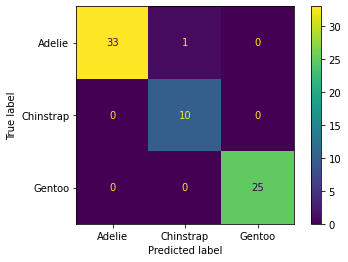

Plot of confusion matrix for LOGISTIC_REGRESSION-- 


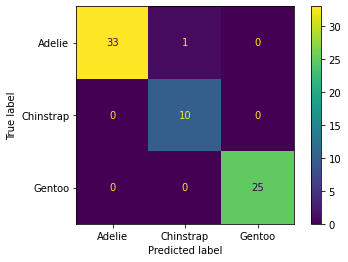

Plot of confusion matrix for SVC-- 


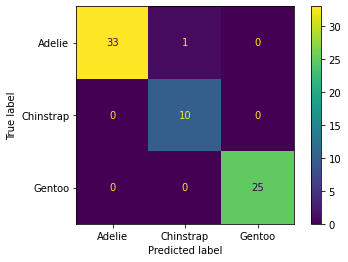

In [14]:
print('Plot of confusion matrix for KNN-- ')
plot_confusion_matrix(classifier_model_knn,testx,testy)
plt.show()
print('Plot of confusion matrix for LOGISTIC_REGRESSION-- ')
plot_confusion_matrix(classifier_model_logistic_regression,testx,testy)
plt.show()
print('Plot of confusion matrix for SVC-- ')
plot_confusion_matrix(classifier_model_svc,testx,testy)
plt.show()

In [15]:
score_knn=classifier_model_knn.score(testx,testy)*100
score_lr=classifier_model_logistic_regression.score(testx,testy)*100
score_svc=classifier_model_svc.score(testx,testy)*100
print("Scores: ")
print(f' For Knn score is: {score_knn}\n For Logistic Regression score is: {score_lr}\n For SVC score is: {score_svc}')

Scores: 
 For Knn score is: 98.55072463768117
 For Logistic Regression score is: 98.55072463768117
 For SVC score is: 98.55072463768117


In [22]:
df2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
